#LGM-VIP-DECEMBER-BEGINNER-TASK 1
##Iris Flowers Classification ML Project 

###Importing all the necessary libraries

In [24]:
import io 
import numpy as np 
import pandas as pd 
import seaborn as sb 
from google.colab import files 
import matplotlib.pyplot as plt 

###To upload the dataset

In [25]:
uploaded = files.upload() 

Saving iris.data to iris (1).data


###Reading the dataset as a csv file

In [26]:
data = pd.read_csv(io.BytesIO(uploaded['iris.data']), names=['Sepal-Length','Sepal-Width','Petal-Length','Petal-Width','Iris-Class']) #Reading csv
data.head() # to show top 5 rows of the data

,Sepal-Length,Sepal-Width,Petal-Length,Petal-Width,Iris-Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


###Analyzing the data

In [27]:
data.describe()

,Sepal-Length,Sepal-Width,Petal-Length,Petal-Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal-Length  150 non-null    float64
 1   Sepal-Width   150 non-null    float64
 2   Petal-Length  150 non-null    float64
 3   Petal-Width   150 non-null    float64
 4   Iris-Class    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


###Plotting a graph to understand the correlation of the features

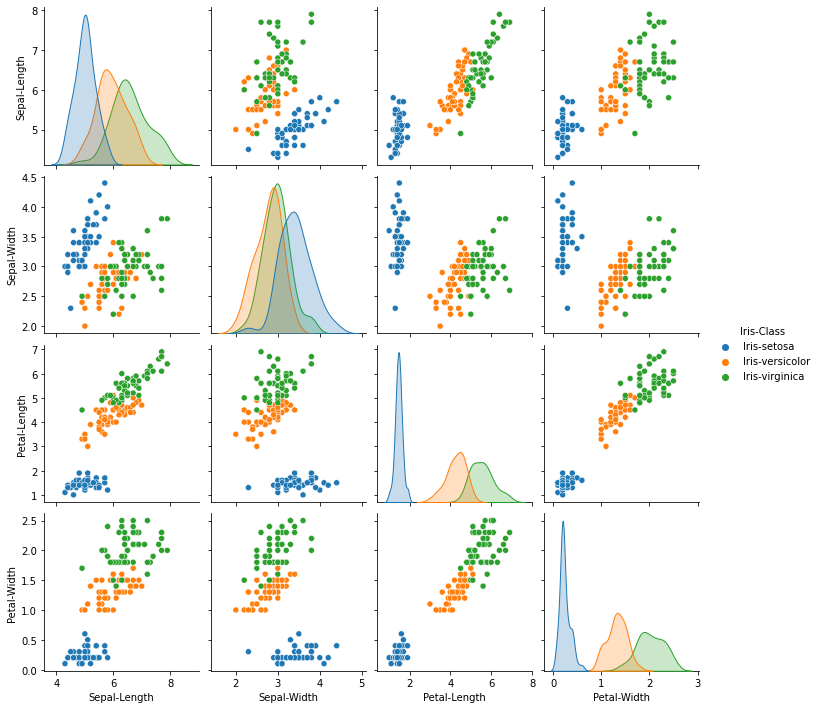

In [29]:
sb.pairplot(data,hue='Iris-Class',vars=['Sepal-Length','Sepal-Width','Petal-Length','Petal-Width'])

###Assigning features into one variable(X) and prediction outcome to another variable(Y)

In [30]:
X=data[['Sepal-Length','Sepal-Width','Petal-Length','Petal-Width']] 
Y=data['Iris-Class'] 

###Splitting the data for traning and testing

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

###To print the training set

In [32]:
X_train

,Sepal-Length,Sepal-Width,Petal-Length,Petal-Width
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


In [33]:
Y_train

91     Iris-versicolor
135     Iris-virginica
69     Iris-versicolor
128     Iris-virginica
114     Iris-virginica
            ...       
133     Iris-virginica
137     Iris-virginica
72     Iris-versicolor
140     Iris-virginica
37         Iris-setosa
Name: Iris-Class, Length: 120, dtype: object

##**Logistic** **Regression**

###Logistic regression is being used for training the model since the predicted output is a category

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [35]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)# Fitting the training data
y_pred = logreg.predict(X_test)# Predicting outcomes from the testing data
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.97


###Printing the classification report

In [36]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



###Calculating and printing the accuracy score  

In [37]:
from sklearn.metrics import accuracy_score
train_score_logreg = str(logreg.score(X_train, Y_train)*100)
test_score_logreg = str(logreg.score(X_test, Y_test)*100)
accu_score_logreg=str(accuracy_score(Y_test,y_pred)*100)
print(f'Train Score : {train_score_logreg[:5]}%\nTest Score : {test_score_logreg[:5]}%\nAccuracy Score : {accu_score_logreg[:5]}%')

Train Score : 98.33%
Test Score : 96.66%
Accuracy Score : 96.66%
